In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import glob
import re


In [2]:
# beige_color = (255/255,253/255,250/255)
beige_color = '#FFFDFA'

# sns.set_theme(style="ticks", rc={'figure.facecolor': beige_color, 'axes.facecolor' : beige_color})
sns.set_theme(style="ticks")
# sns.set_context("talk")
# sns.set_context("poster")


In [3]:
path = "results/linear_multi"
# path = "results/linear_multi/N500"
# path = "results/nonlinear_multi"
# path = "results/nonlinear_multi/trunc_parab"
all_file = glob.glob(path + "/*.csv")
print(all_file)

['results/linear_multi\\linear_dgp_1.csv', 'results/linear_multi\\linear_dgp_10.csv', 'results/linear_multi\\linear_dgp_11.csv', 'results/linear_multi\\linear_dgp_12.csv', 'results/linear_multi\\linear_dgp_13.csv', 'results/linear_multi\\linear_dgp_14.csv', 'results/linear_multi\\linear_dgp_15.csv', 'results/linear_multi\\linear_dgp_16.csv', 'results/linear_multi\\linear_dgp_17.csv', 'results/linear_multi\\linear_dgp_18.csv', 'results/linear_multi\\linear_dgp_19.csv', 'results/linear_multi\\linear_dgp_2.csv', 'results/linear_multi\\linear_dgp_20.csv', 'results/linear_multi\\linear_dgp_21.csv', 'results/linear_multi\\linear_dgp_22.csv', 'results/linear_multi\\linear_dgp_23.csv', 'results/linear_multi\\linear_dgp_24.csv', 'results/linear_multi\\linear_dgp_25.csv', 'results/linear_multi\\linear_dgp_26.csv', 'results/linear_multi\\linear_dgp_27.csv', 'results/linear_multi\\linear_dgp_28.csv', 'results/linear_multi\\linear_dgp_29.csv', 'results/linear_multi\\linear_dgp_3.csv', 'results/line

In [4]:
extracted_numbers = [re.findall(r'\d+', s) for s in all_file]
first_numbers = [int(numbers[0]) if numbers else None for numbers in extracted_numbers]
first_numbers.sort()
first_numbers

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [4]:
lin_dfs = [pd.read_csv(f) for f in all_file]
combined_df = pd.concat(lin_dfs)
combined_df[['model', 'type']] = combined_df['method'].str.split('_', expand=True)
print(combined_df)

       idx   mean  median   true   bias    std   RMSE    MAE   q025   q975  \
0      1.0  1.214   1.214  1.186  0.028  0.032  0.053  0.028  1.153  1.277   
1      1.0  1.209   1.209  1.186  0.023  0.036  0.135  0.076  1.136  1.277   
2      1.0  4.099   4.098  4.004  0.095  0.107  0.095  0.094  3.890  4.310   
3      1.0  3.991   3.994  4.004 -0.013  0.135  0.407  0.223  3.721  4.252   
4      1.0  0.817   0.816  1.186 -0.369  0.073  0.512  0.409  0.674  0.963   
..     ...    ...     ...    ...    ...    ...    ...    ...    ...    ...   
155  504.0  2.463   2.461  3.830 -1.367  0.257  1.518  1.367  1.968  2.969   
156  504.0  0.847   0.847  0.865 -0.018  0.032  0.220  0.173  0.785  0.909   
157  504.0  0.770   0.773  0.865 -0.095  0.059  0.355  0.233  0.642  0.878   
158  504.0  3.934   3.934  3.830  0.104  0.146  0.287  0.229  3.649  4.221   
159  504.0  3.452   3.464  3.830 -0.378  0.307  0.765  0.454  2.805  4.015   

     covering  mean_ind_cover           method estimand  TRUE  

In [5]:
combined_df[['bias','median','true','mean','std','RMSE','q025','q975','covering']] = combined_df[['bias','median','true','mean','std','RMSE','q025','q975','covering']].apply(pd.to_numeric, errors='coerce')

In [6]:
# combined_df = combined_df.apply(pd.to_numeric, errors='coerce')


combined_df['type'] = combined_df['type'].replace('observed',"Obs.")
combined_df['type'] = combined_df['type'].replace('oracle',"Oracle")
combined_df['type'] = combined_df['type'].replace('plugin',"Plugin")
combined_df['abs_bias'] = np.abs(combined_df['bias'])
combined_df['ci_length'] = combined_df['q975'] - combined_df['q025']
combined_df['MAPE_manual'] = np.abs((combined_df['mean']-combined_df['true'])/combined_df['true'])

# combined_df.to_csv("results/linear_dgp_N300.csv")


In [7]:
combined_df[combined_df["estimand"]=="dynamic"]

,idx,mean,median,true,bias,std,RMSE,MAE,q025,q975,covering,mean_ind_cover,method,estimand,TRUE,model,type,abs_bias,ci_length,MAPE_manual
0,1.0,1.214,1.214,1.186,0.028,0.032,0.053,0.028,1.153,1.277,1.0,1.000,Linear_oracle,dynamic,NaN,Linear,Oracle,0.028,0.124,0.023609
1,1.0,1.209,1.209,1.186,0.023,0.036,0.135,0.076,1.136,1.277,1.0,0.986,GP_oracle,dynamic,NaN,GP,Oracle,0.023,0.141,0.019393
4,1.0,0.817,0.816,1.186,-0.369,0.073,0.512,0.409,0.674,0.963,0.0,0.238,Linear_observed,dynamic,NaN,Linear,Obs.,0.369,0.289,0.311130
5,1.0,0.442,0.442,1.186,-0.744,0.096,0.853,0.765,0.251,0.633,0.0,0.132,GP_observed,dynamic,NaN,GP,Obs.,0.744,0.382,0.627319
8,1.0,1.154,1.154,1.186,-0.032,0.045,0.243,0.192,1.068,1.245,1.0,0.926,Linear_3S,dynamic,NaN,Linear,3S,0.032,0.177,0.026982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,504.0,0.579,0.579,0.865,-0.286,0.048,0.469,0.384,0.484,0.673,0.0,0.324,GP_observed,dynamic,NaN,GP,Obs.,0.286,0.189,0.330636
152,504.0,0.735,0.733,0.865,-0.130,0.038,0.261,0.200,0.667,0.813,0.0,0.838,Linear_3S,dynamic,NaN,Linear,3S,0.130,0.146,0.150289
153,504.0,0.545,0.549,0.865,-0.320,0.074,0.523,0.355,0.391,0.679,0.0,0.788,GP_3S,dynamic,NaN,GP,3S,0.320,0.288,0.369942
156,504.0,0.847,0.847,0.865,-0.018,0.032,0.220,0.173,0.785,0.909,1.0,0.248,Linear_1S,dynamic,NaN,Linear,1S,0.018,0.124,0.020809


In [8]:
def coverage_perc(x):
    return np.mean(x)*100

# df_summary = combined_df.groupby(["estimand", "model", "type"]).agg(
df_summary = combined_df.groupby(["estimand", "model", "type"]).agg(
                                        {'mean' : ['mean'],
                                         'median' : ['mean'],
                                         'std' : ['mean'],
                                         'bias' : ['mean'],
                                         'true' : ['mean'],
                                         'RMSE' : ['mean'],
                                         'MAE' : ['mean'],
                                         # 'MAPE' : ['mean'],
                                         'MAPE_manual' : ['mean'],
                                         'q025' : ['mean'],
                                         'q975' : ['mean'],
                                         'ci_length' : ['mean'],
                                         'covering' : [coverage_perc],
                                         'mean_ind_cover' : ['mean']}).reset_index()
                                         # 'true_included99' : [coverage_perc]})
                                         # 'true_included95' : ['mean'],
                                         # 'true_included99' : ['mean']})

df_summary


,estimand,model,type,mean,median,std,bias,true,RMSE,MAE,MAPE_manual,q025,q975,ci_length,covering,mean_ind_cover
,,,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,coverage_perc,mean
0,dynamic,GP,1S,1.006311,1.007383,0.068425,-0.084355,1.090609,0.362497,0.252377,0.086247,0.867341,1.139509,0.272168,71.342685,0.511840
1,dynamic,GP,3S,2.332778,2.335758,0.087383,1.242112,1.090609,1.904369,1.632437,1.513048,2.154114,2.494914,0.340800,0.601202,0.648337
2,dynamic,GP,Obs.,0.609138,0.608984,0.070451,-0.481527,1.090609,0.663653,0.572589,0.440013,0.471327,0.747573,0.276247,1.202405,0.212802
3,dynamic,GP,Oracle,1.045198,1.045958,0.044768,-0.045467,1.090609,0.211142,0.100695,0.047264,0.953884,1.131685,0.177802,82.765531,0.913222
4,dynamic,Linear,1S,1.080597,1.080575,0.037327,-0.010068,1.090609,0.233792,0.184295,0.034213,1.007247,1.154100,0.146854,86.172345,0.273050
5,dynamic,Linear,3S,0.960740,0.959220,0.044273,-0.129926,1.090609,0.269679,0.210238,0.118271,0.878768,1.052405,0.173637,20.440882,0.867363
6,dynamic,Linear,Obs.,0.795864,0.795952,0.058443,-0.294802,1.090609,0.459906,0.366631,0.267206,0.681196,0.910868,0.229671,4.208417,0.232934
7,dynamic,Linear,Oracle,1.089625,1.089563,0.031409,-0.001040,1.090609,0.040160,0.029583,0.023010,1.027786,1.151549,0.123764,94.589178,0.948942
8,stoch,GP,1S,3.421269,3.427673,0.266142,-0.458102,3.878362,0.783725,0.555483,0.120597,2.882136,3.926698,1.044561,56.112224,0.694778


Text(0, 0.5, '')

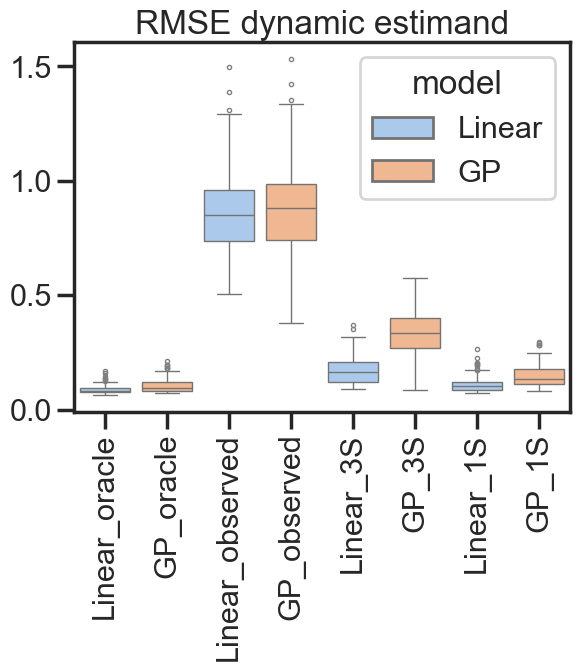

In [289]:
flierprops = dict(marker='.', markerfacecolor='None', markersize=6,  markeredgecolor='grey')
box_rmse = sns.boxplot(data=combined_df[combined_df["estimand"]=="dynamic"], x = 'method', y = 'RMSE',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "model", palette = 'pastel',
                       flierprops=flierprops)
box_rmse.set_title("RMSE dynamic estimand")
# plt.ylim(0,.5)
plt.xticks(rotation=90)
box_rmse.set_xlabel("")
box_rmse.set_ylabel("")
# sns.despine()

Text(0, 0.5, '')

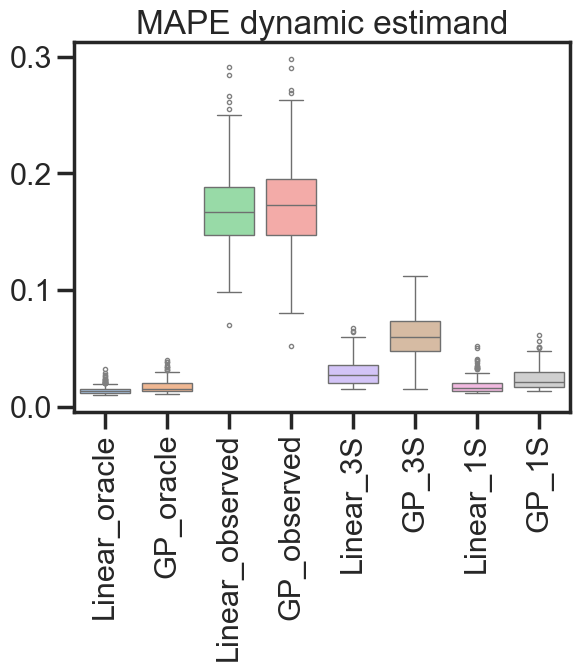

In [10]:
flierprops = dict(marker='.', markerfacecolor='None', markersize=6,  markeredgecolor='grey')
box_rmse = sns.boxplot(data=combined_df[combined_df["estimand"]=="dynamic"], x = 'method', y = 'MAPE',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
box_rmse.set_title("MAPE dynamic estimand")
# plt.ylim(0,.5)
plt.xticks(rotation=90)
box_rmse.set_xlabel("")
box_rmse.set_ylabel("")

Text(0, 0.5, '')

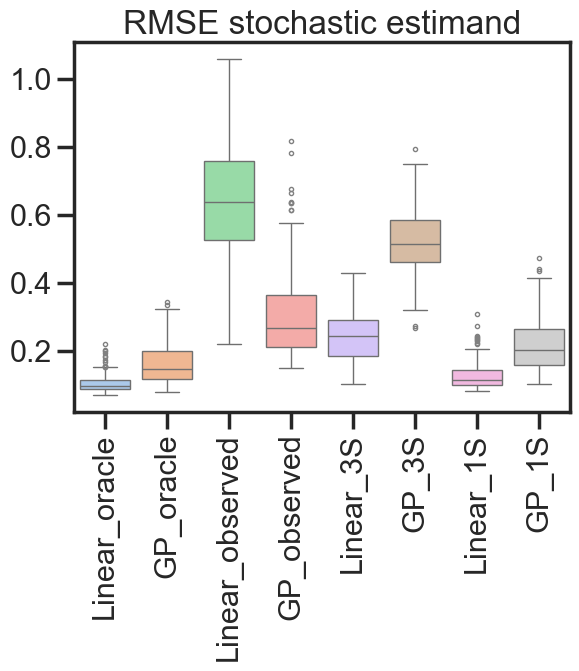

In [11]:
flierprops = dict(marker='.', markerfacecolor='None', markersize=6,  markeredgecolor='grey')
box_rmse = sns.boxplot(data=combined_df[combined_df["estimand"]=="stoch"], x = 'method', y = 'RMSE',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
box_rmse.set_title("RMSE stochastic estimand")
# plt.ylim(0,.25)
plt.xticks(rotation=90)
box_rmse.set_xlabel("")
box_rmse.set_ylabel("")

Text(0, 0.5, '')

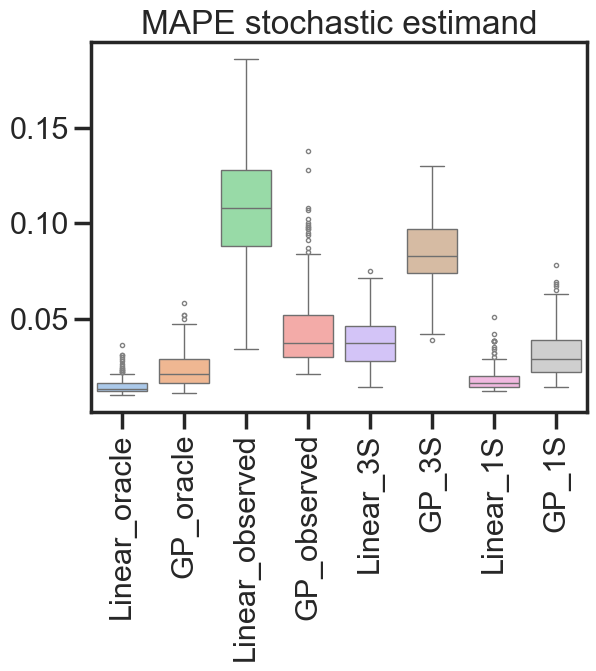

In [12]:
flierprops = dict(marker='.', markerfacecolor='None', markersize=6,  markeredgecolor='grey')
box_rmse = sns.boxplot(data=combined_df[combined_df["estimand"]=="stoch"], x = 'method', y = 'MAPE',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
box_rmse.set_title("MAPE stochastic estimand")
# plt.ylim(0,.25)
plt.xticks(rotation=90)
box_rmse.set_xlabel("")
box_rmse.set_ylabel("")

Text(0, 0.5, '')

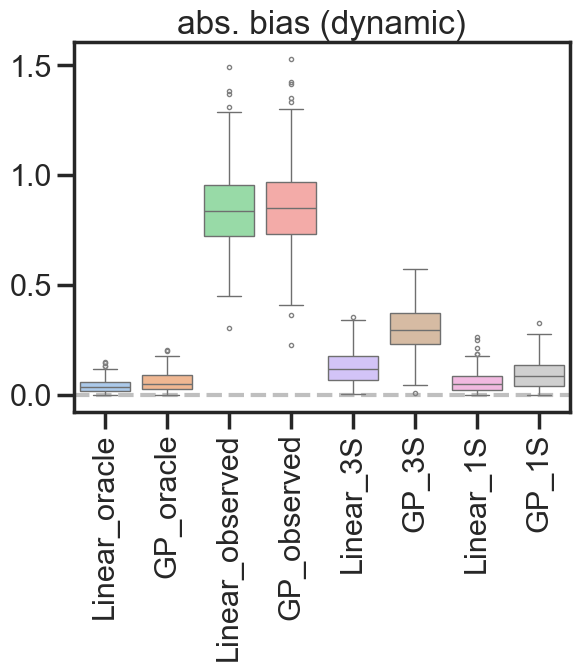

In [13]:
box_bias = sns.boxplot(data=combined_df[combined_df["estimand"]=="dynamic"], x = 'method', y = 'abs_bias',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
plt.axhline(0, color='grey', linestyle='--', alpha=0.5)
box_bias.set_title("abs. bias (dynamic)")
# plt.ylim(0,.5)
plt.xticks(rotation=90)
box_bias.set_xlabel("")
box_bias.set_ylabel("")

Text(0, 0.5, '')

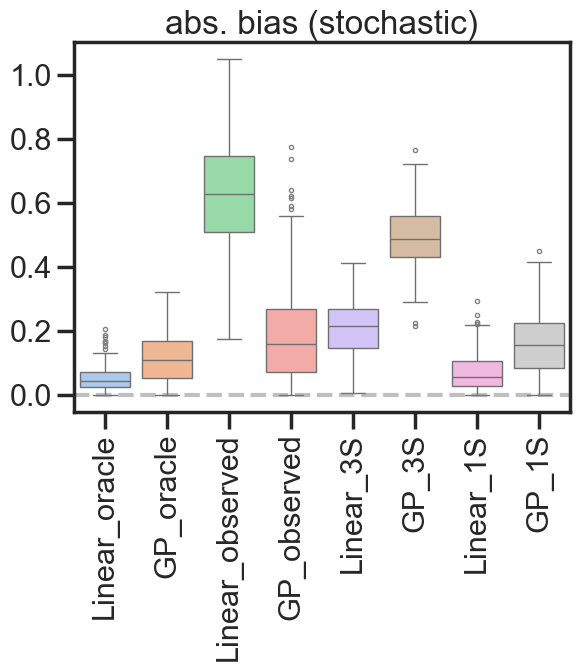

In [14]:
box_bias = sns.boxplot(data=combined_df[combined_df["estimand"]=="stoch"], x = 'method', y = 'abs_bias',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
plt.axhline(0, color='grey', linestyle='--', alpha=0.5)
box_bias.set_title("abs. bias (stochastic)")
# plt.ylim(0,.25)
plt.xticks(rotation=90)
box_bias.set_xlabel("")
box_bias.set_ylabel("")

Text(0, 0.5, '')

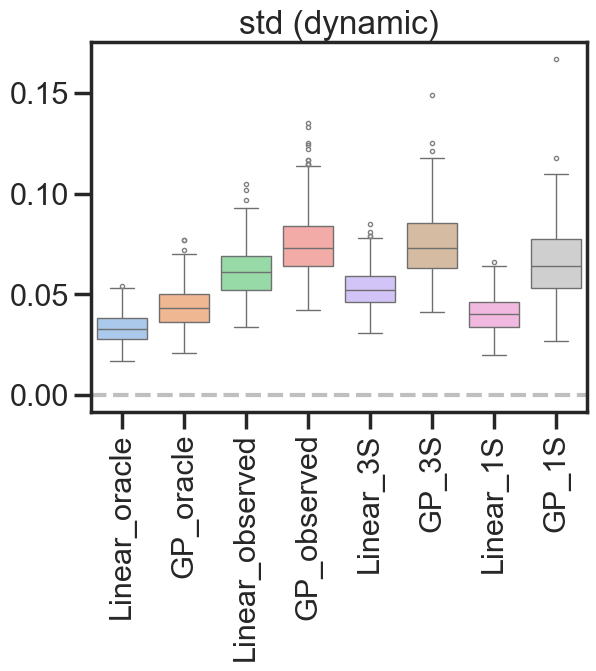

In [19]:
box_std = sns.boxplot(data=combined_df[combined_df["estimand"]=="dynamic"], x = 'method', y = 'std',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
plt.axhline(0, color='grey', linestyle='--', alpha=0.5)
box_std.set_title("std (dynamic)")
# plt.ylim(0,.2)
plt.xticks(rotation=90)
box_std.set_xlabel("")
box_std.set_ylabel("")

Text(0, 0.5, '')

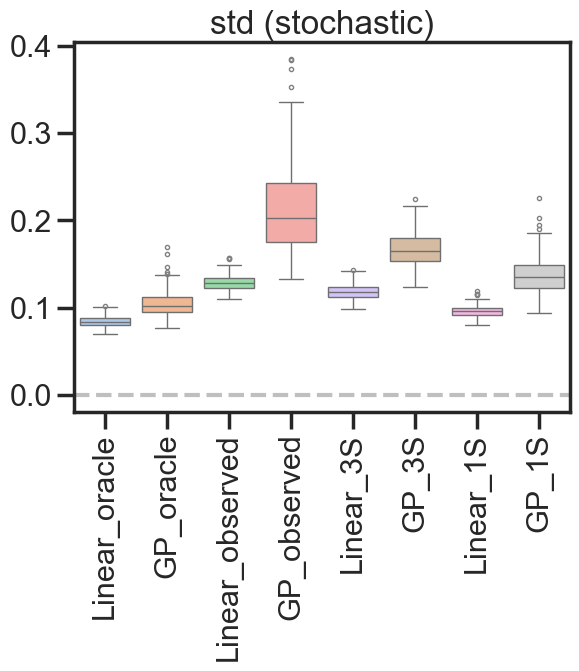

In [15]:
box_std = sns.boxplot(data=combined_df[combined_df["estimand"]=="stoch"], x = 'method', y = 'std',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "method", palette = 'pastel',
                       flierprops=flierprops)
plt.axhline(0, color='grey', linestyle='--', alpha=0.5)
box_std.set_title("std (stochastic)")
# plt.ylim(0,.1)
plt.xticks(rotation=90)
box_std.set_xlabel("")
box_std.set_ylabel("")

In [1]:
def format_percentage(value, x=1):
    return f"{value*x:.1f}%"

df_summary_dynamic = df_summary[df_summary["estimand"]=="dynamic"]
# df_summary_dynamic = df_summary[df_summary["estimand"]=="stoch"]
df_summary_dynamic.columns = df_summary_dynamic.columns.droplevel(1)
df_summary_dynamic["coverage"] = df_summary_dynamic["covering"].apply(format_percentage)
df_summary_dynamic["mean_ind_cover"] = df_summary_dynamic["mean_ind_cover"].apply(format_percentage, x=100)
print(df_summary_dynamic)

combined_df_dynamic = combined_df[combined_df["estimand"]=="dynamic"]
# combined_df_dynamic = combined_df[combined_df["estimand"]=="stoch"]
# print(combined_df_dynamic)

NameError: name 'df_summary' is not defined

In [11]:
df_summary_dynamic['model_type'] = df_summary_dynamic[['model', 'type']].apply(lambda x: '_'.join(x), axis=1)

print(df_summary_dynamic)


  estimand   model    type      mean    median       std      bias      true  \
0  dynamic      GP      1S  0.888614  0.890965  0.091833 -0.136851  1.025465   
1  dynamic      GP      3S  1.919614  1.920079  0.123219  0.894149  1.025465   
2  dynamic      GP    Obs.  0.671579  0.671421  0.081886 -0.353886  1.025465   
3  dynamic      GP  Oracle  0.912623  0.913123  0.062842 -0.112842  1.025465   
4  dynamic  Linear      1S  1.387290  1.387263  0.039904  0.361825  1.025465   
5  dynamic  Linear      3S  1.219965  1.218421  0.054763  0.194500  1.025465   
6  dynamic  Linear    Obs.  0.953816  0.953956  0.072184 -0.071649  1.025465   
7  dynamic  Linear  Oracle  1.291377  1.291272  0.037868  0.265912  1.025465   

       RMSE       MAE  MAPE_manual      q025      q975  ci_length   covering  \
0  0.747316  0.488728     0.140150  0.702570  1.061342   0.358772  64.912281   
1  2.146219  1.714737     0.914583  1.677456  2.158693   0.481237   0.000000   
2  0.932368  0.611289     0.346920  0.5

C:\Users\bar21\AppData\Local\Temp\ipykernel_10328\2384414092.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_summary_dynamic['model_type'] = df_summary_dynamic[['model', 'type']].apply(lambda x: '_'.join(x), axis=1)


In [12]:
df_summary_dynamic["true"]

0    1.025465
1    1.025465
2    1.025465
3    1.025465
4    1.025465
5    1.025465
6    1.025465
7    1.025465
Name: true, dtype: float64

C:\Users\bar21\AppData\Local\Temp\ipykernel_10328\2600981097.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_summary_dynamic['categ_pos'] = df_summary_dynamic['model_type'].map(categ_pos)


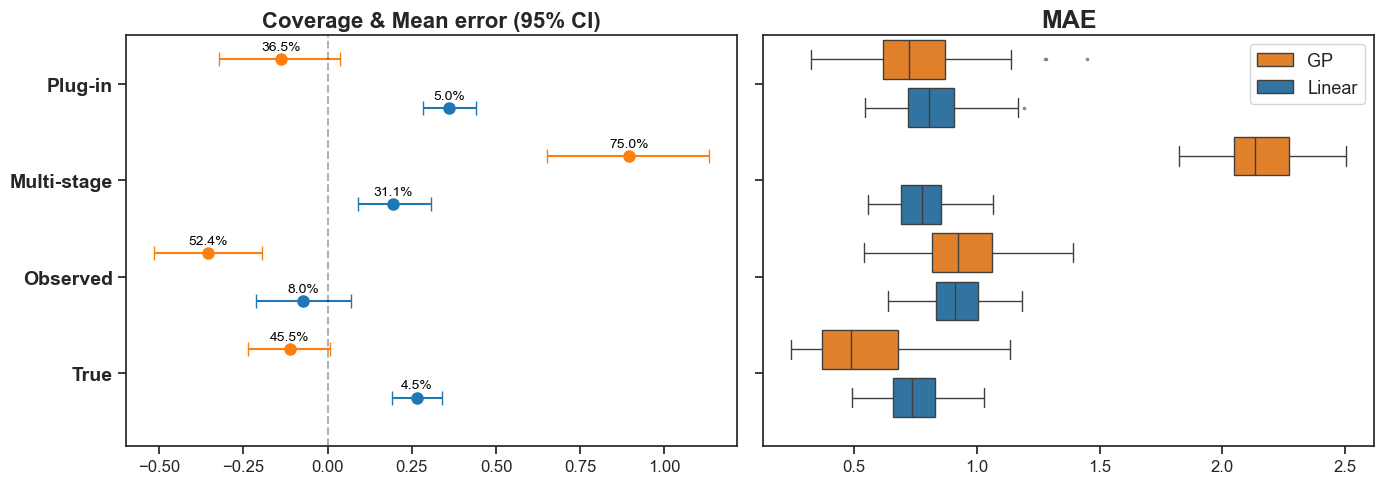

In [13]:
# Plot points with error bars
categories = np.arange(len(df_summary_dynamic['model_type']))
category_labels = df_summary_dynamic['model_type'].unique()

# Create a dictionary to map category positions

# Map categ to positions
model_names = ['True', 'Observed', 'Multi-stage', 'Plug-in']
model_order = ['Linear_Oracle', 'GP_Oracle', 'Linear_Obs.', 'GP_Obs.',
               'Linear_3S', 'GP_3S', 'Linear_1S', 'GP_1S']
categ_pos = {category: pos for pos, category in enumerate(model_order)}
df_summary_dynamic['categ_pos'] = df_summary_dynamic['model_type'].map(categ_pos)
# combined_df_dynamic['categ_pos'] = combined_df_dynamic['model_type'].map(categ_pos)

# Assign colors to categ2
unique_categ2 = df_summary_dynamic['model']
# colors = plt.cm.tab10(np.linspace(0, 1, len(unique_categ2)))
color_map = { "GP" : "tab:orange", "Linear" : "tab:blue"}
# color_map = dict(zip(unique_categ2, colors))

# Plotting
plt.style.use('seaborn-v0_8-colorblind')
# plt.style.use('fast')

fig, axs = plt.subplots(1, 2, figsize=(14, 5),
                        gridspec_kw={'width_ratios': [1, 1]}, sharey=True)
# for ax in axs:
#     ax.set_facecolor('white')
# Plot points with different colors based on categ2
for categ2 in unique_categ2:
    subset = df_summary_dynamic[df_summary_dynamic['type'] == categ2]
    axs[0].scatter(subset['mean'],
                subset['categ_pos'],
                label=f'{categ2}', color=color_map[categ2], s=650)


for i, row in df_summary_dynamic.iterrows():
    axs[0].errorbar(
        row['mean'] - row['true'], 
        row['categ_pos'], 
        xerr=[[row['mean'] - row['q025']],
              [row['q975'] - row['mean']]], 
        fmt='o', 
        # color='black', 
        color = color_map[row['model']], 
        ecolor = color_map[row['model']], 
        # ecolor='black', 
        capsize=5, markersize = 8   
    )
    
    axs[0].annotate(
                    row['mean_ind_cover'], 
                    # row['coverage'], 
                    xy=(row['mean'] - row['true'], row['categ_pos']), 
                    xytext=(0, 13), 
                    textcoords='offset points', 
                    ha='center', 
                    va='top',
                    fontsize=10, 
                    color='black')    

# Customize the x-axis to show category labels
axs[0].set_yticks(np.arange(0.5,len(model_order),2))
# axs[0].set_yticklabels(model_order)
axs[0].set_yticklabels(model_names, fontsize=14, fontweight='bold')
axs[0].set_ylim(-1, len(model_order) - 0.5)
# axs[0].axvline(df_summary_dynamic["true"][0], color='grey', linestyle='--', alpha=0.5)
axs[0].axvline(0, color='black', linestyle='--', alpha=0.3)
axs[0].set_title('Coverage & Mean error (95% CI)', fontsize=16, fontweight='bold')
# axs[0].grid(True)


flierprops = dict(marker='.', markerfacecolor='None', markersize=3,  markeredgecolor='grey')
sns.boxplot(
    data=combined_df_dynamic, 
    # x='MAE', 
    x='RMSE', 
    # x='MAPE_manual', 
    y='method', 
    hue="model", 
    palette=color_map, 
    ax=axs[1],
    flierprops=flierprops
)

axs[1].set_yticks(np.arange(0.5,len(model_order),2))
axs[1].set_ylim(-1, len(model_order) - 0.5)
# axs[1].set_yticklabels([])
axs[1].set_xlabel('')
axs[1].set_ylabel('')
axs[1].set_title('MAE', fontsize=18, fontweight='bold')
handles, labels = axs[1].get_legend_handles_labels()
ordered_handles = [handles[1], handles[0]]  # Reorder legend
ordered_labels = [labels[1], labels[0]]  # Reorder labels
axs[1].legend(ordered_handles, ordered_labels, title='', loc='upper right', 
              fontsize=13)
# axs[1].grid(True)
plt.tight_layout()
# plt.style.use('seaborn-whitegrid')
axs[0].tick_params(axis='x', labelsize=12)
axs[1].tick_params(axis='x', labelsize=12)


# plt.savefig('results/figs/nonlin_truncated_parab.png', dpi = 1000)           # Save as PNG file
plt.show()
